## Python for Data Science

If you were in the python session about functions and classes, the following code sample is super awesome for motivating [numerical methods](https://nbviewer.jupyter.org/github/davidrpugh/numerical-methods/blob/master/labs/lab-1/lab-1.ipynb) in Python.

We will be using the FiveThirtyEight [article](https://github.com/fivethirtyeight/data/tree/master/puerto-rico-media) about Puerto Rico and media attention

This orientation session will be tailored to doing some data analysis in Python using the [pandas](https://pandas.pydata.org/pandas-docs/stable/) data science package. A really good blog post to step you through some more in-depth pandas learning is linked [here](https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955). This tutorial is very distilled down.

Note, for analysis we will be using these date cutoffs:
* Hurricane Harvey makes landfall 8/25/17 
* Hurricane Irma makes landfall 9/10/17
* Hurricane Maria makes landfall 9/20/17

In [100]:

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import getpass
import math

if getpass.getuser()=="nadialucas":
    dbPath = r"/Users/nadialucas/Dropbox/epic_predoc_resources/epic_orientation"
else:
	print("please add your machine's directory")


# Set directory paths
dataPath = r"{}/data/Python_R_Puerto_Rico".format(dbPath)

# read in 
media_trump_filename = r"{}/mediacloud_trump.csv".format(dataPath)
google_trends_filename = r"{}/google_trends.csv".format(dataPath)
media_states_filename = r"{}/mediacloud_states.csv".format(dataPath)
media_hurricanes_filename = r"{}/mediacloud_hurricanes.csv".format(dataPath)
tv_hurricanes_filename = r"{}/tv_hurricanes.csv".format(dataPath)
tv_hurricanes_by_network_filename = r"{}/tv_hurricanes_by_network.csv".format(dataPath)

### Pandas

Pandas is an open-source package that has been written for Python that builds off of existing data structures. Some basic data structures underlying pandas dataframes are arrays (specifically ndarrays) and dictionaries.

#### Arrays

Arrays are lists of objects. Arrays are quite flexible and can contain any different data types. Functions can be powerfully mapped onto arrays. Some of you may find this similar to Stata where manipulating data is done on a 'per variable' basis.

#### Dictionaries

Dictionaries, otherwise known as hash tables, are mappings of key, value pairs. They provide very fast lookup time and can store a lot of data.

#### Pandas Dataframes

Pandas Dataframes are [data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) that are built off of arrays (specifically ndarrays) and dictionaries. They are very flexible and can be created either by using dictionaries of arrays or by arrays of dictionaries. Python is pretty smart and can usually figure out what you are trying to pass into it.

In [101]:
dict_of_arrays = {'id': [1,2,3,4,5], 
                'Name': ['Trin', 'Henry', 'Andrew', 'Sunny','Kotia'], 
                'Hometown': ['SINGAPORE', 'DENVER', 'HOUSTON', 'PROVIDENCE', 'NEW DELHI']}
pd_doa = pd.DataFrame(dict_of_arrays)
print(pd_doa.head())

     Hometown    Name  id
0   SINGAPORE    Trin   1
1      DENVER   Henry   2
2     HOUSTON  Andrew   3
3  PROVIDENCE   Sunny   4
4   NEW DELHI   Kotia   5


In [102]:
array_of_dicts = [{'id': 1, 'Name': 'Trin', 'Hometown': 'SINGAPORE'},
                  {'id': 2, 'Name': 'Henry', 'Hometown': 'DENVER'},
                  {'id': 3, 'Name': 'Andrew', 'Hometown': 'HOUSTON'},
                  {'id': 4, 'Name': 'Sunny', 'Hometown': 'PROVIDENCE'},
                  {'id': 5, 'Name': 'Kotia', 'Hometown': 'NEW DELHI'}]
pd_aod = pd.DataFrame(array_of_dicts)
print(pd_aod.head())

     Hometown    Name  id
0   SINGAPORE    Trin   1
1      DENVER   Henry   2
2     HOUSTON  Andrew   3
3  PROVIDENCE   Sunny   4
4   NEW DELHI   Kotia   5


### Reading in Data

Of course, there are built-in funtions that read data from outside files as pandas objects, which is what you'll end up needing to do but understanding the basic data structures pandas dataframes are built off of will help you understand the syntax of using and manipulating these data structures

In [103]:
# we create the object media_trump which is an instance of a pandas dataframe
media_trump = pd.read_csv(media_trump_filename)
google_trends = pd.read_csv(google_trends_filename)
media_states = pd.read_csv(media_states_filename)
media_hurricanes = pd.read_csv(media_hurricanes_filename)
tv_hurricanes = pd.read_csv(tv_hurricanes_filename)
tv_hurricanes_by_network = pd.read_csv(tv_hurricanes_by_network_filename)

print(google_trends.head())

       Day  "Hurricane Harvey": (United States)  \
0  8/20/17                                    0   
1  8/21/17                                    0   
2  8/22/17                                    0   
3  8/23/17                                    1   
4  8/24/17                                    9   

   "Hurricane Irma": (United States)  "Hurricane Maria": (United States)  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   "Hurricane Jose": (United States)  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  


## Manipulating Data

In [104]:
# For some reason the csvs we read in sometimes has wonky or long variable titles so let's clean those up
# and make sure to get rid of random quotation marks we find.
media_trump = media_trump.rename(columns = {'title:"Puerto Rico"': 'PuertoRico',
                                 'title:"Puerto Rico" AND (title:Trump OR title:President)': 'PuertoRico_Trump',
                                 'title:Florida': 'Florida',
                                 'title:Florida AND (title:Trump OR title:President)': 'Florida_Trump', 
                                 'title:Texas': 'Texas',
                                 'title:Texas AND (title:Trump OR title:President)': 'Texas_Trump'})

google_trends = google_trends.rename({'"Hurricane Harvey": (United States)': 'Harvey_US',
                                    '"Hurricane Irma": (United States)': 'Irma_US',
                                    '"Hurricane Maria": (United States)': 'Maria_US',
                                    '"Hurricane Jose": (United States)': 'Jose_US',
                                    '"Puerto Rico"': 'Puerto Rico'}, axis = 'columns')
print(google_trends.head())

       Day  Harvey_US  Irma_US  Maria_US  Jose_US
0  8/20/17          0        0         0        0
1  8/21/17          0        0         0        0
2  8/22/17          0        0         0        0
3  8/23/17          1        0         0        0
4  8/24/17          9        0         0        0


## Indexing Data

You can use .loc to index both rows and columns by name. Syntax is 
```
df.loc[row_begin : row_end, column_begin : column_end]
df.loc[[row_1, row_2, ...], [column_1, column_2, ...]]
```

You can use .iloc to index both rows and columns by index instead of name with the same syntax.

In [105]:
loc_slice = google_trends.loc[:, ['Day', 'Harvey_US']]

print(loc_slice[:5])

       Day  Harvey_US
0  8/20/17          0
1  8/21/17          0
2  8/22/17          0
3  8/23/17          1
4  8/24/17          9


In [106]:
iloc_slice = google_trends.iloc[:6, 0:4]

print(iloc_slice)

       Day  Harvey_US  Irma_US  Maria_US
0  8/20/17          0        0         0
1  8/21/17          0        0         0
2  8/22/17          0        0         0
3  8/23/17          1        0         0
4  8/24/17          9        0         0
5  8/25/17         29        0         0


## Masking

A function to find and replace all observations that meet a certain criterion using boolean logic. The following code shows how you slice the variable in question and then apply a mask to just that variable and add it back into the dataframe. You can also apply a mask to an entire dataframe which would find and then replace all rows instead of singular observations.

Note: We first create a copy of the dataframe we can manipulate so we don't affect later code that uses the original. We have to use the copy() function to replicate the dataframe entirely, otherwise we would just be setting the two variable name pointers equal to each other and manipulating the original dataframe anyways.

In [119]:
google_trends_copy = google_trends.copy()
mask = google_trends_copy.Irma_US.mask(google_trends_copy.Irma_US>20, 1000)
google_trends_copy["Irma_US"] = mask
print(google_trends_copy[12:18])

       Day  Harvey_US  Irma_US  Maria_US  Jose_US
12  9/1/17          7       14         0        0
13  9/2/17          5       13         0        0
14  9/3/17          4     1000         0        0
15  9/4/17          3     1000         0        0
16  9/5/17          4     1000         0        1
17  9/6/17          4     1000         0        3


## Functionals


In [120]:
# the dataframe is generally very flexible so in the case we want
# to plot date objects on the x-axis we can remove dates as a vector
# and do a list functional
# pandas is known for its time series functionality
google_trends_dates = google_trends['Day']
# the following is a list functional
google_trends_date_objects = [dt.datetime.strptime(d,'%m/%d/%y').date() for d in google_trends_dates]
print(google_trends.head())

       Day  Harvey_US  Irma_US  Maria_US  Jose_US
0  8/20/17          0        0         0        0
1  8/21/17          0        0         0        0
2  8/22/17          0        0         0        0
3  8/23/17          1        0         0        0
4  8/24/17          9        0         0        0


## Visualizing Data

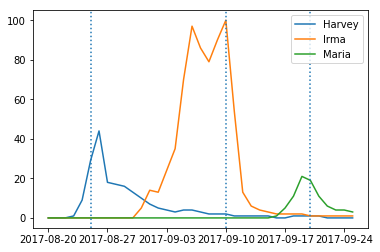

In [14]:
# then we can plot the x-axis as a date object instead of dealing with a 
# clutter of dates as strings
plt.plot(google_trends_date_objects, google_trends['Harvey_US'], label = "Harvey")
plt.plot(google_trends_date_objects, google_trends['Irma_US'], label = "Irma")
plt.plot(google_trends_date_objects, google_trends['Maria_US'], label = "Maria")
plt.axvline(x=dt.datetime.strptime("9/20/17", '%m/%d/%y').date(), linestyle = 'dotted')
plt.axvline(x=dt.datetime.strptime("8/25/17", '%m/%d/%y').date(), linestyle = 'dotted')
plt.axvline(x=dt.datetime.strptime("9/10/17", '%m/%d/%y').date(), linestyle = 'dotted')
plt.legend(loc='best')

plt.show()
